In [300]:
import pandas as pd
import matplotlib.pyplot as plt

In [301]:
file = 'social_media.csv'
data = pd.read_csv(file)

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3000 non-null   int64 
 1   platform   3000 non-null   object
 2   username   3000 non-null   object
 3   post_date  3000 non-null   object
 4   content    3000 non-null   object
 5   likes      3000 non-null   int64 
 6   comments   3000 non-null   int64 
 7   shares     3000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 187.6+ KB


In [303]:
data['post_date'] = pd.to_datetime(data['post_date'])

In [304]:
#Bagaimana perkembangan jumlah pengikut (followers) selama beberapa bulan terakhir untuk beberapa akun tertentu di media sosial?

#Dari tampilan data yang ada, saya melihat bahwa file CSV tersebut berisi informasi mengenai beberapa akun media sosial, platform,
#username, tanggal posting, isi konten, jumlah likes, komentar, dan shares. Namun, data ini tidak memuat informasi tentang jumlah pengikut secara langsung.

In [305]:
#Apakah terdapat pola tertentu dalam frekuensi posting atau aktivitas pengguna pada jam-jam tertentu dalam sehari?

data['hour'] = data['post_date'].dt.hour
hourly_posts = data.groupby('hour').size()

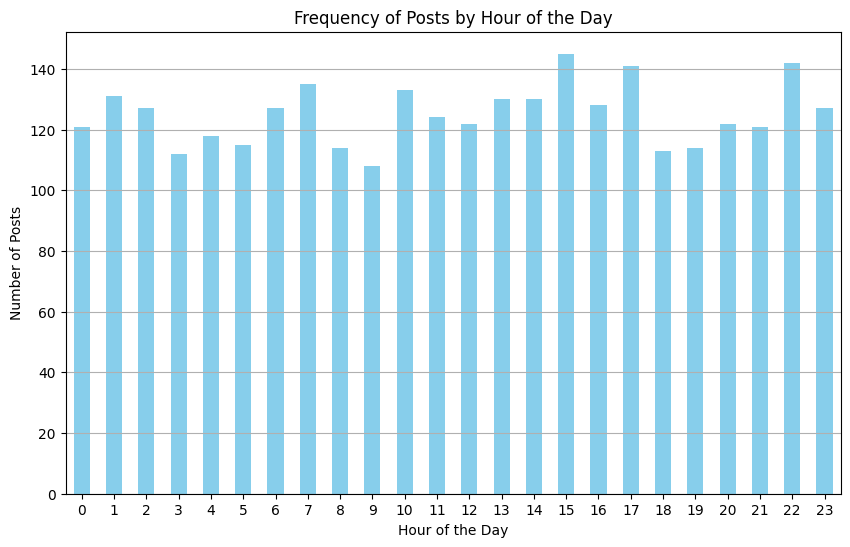

In [306]:
plt.figure(figsize=(10, 6))
hourly_posts.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts')
plt.title('Frequency of Posts by Hour of the Day')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [307]:
#Hitung rata-rata jumlah likes, komentar, dan share pada setiap postingan dalam dataset.

average_likes = data['likes'].mean()
average_comments = data['comments'].mean()
average_shares = data['shares'].mean()

print(f'Average number of likes per post: {average_likes:.2f}')
print(f'Average number of comments per post: {average_comments:.2f}')
print(f'Average number of shares per post: {average_shares:.2f}')

Average number of likes per post: 154.73
Average number of comments per post: 25.49
Average number of shares per post: 15.34


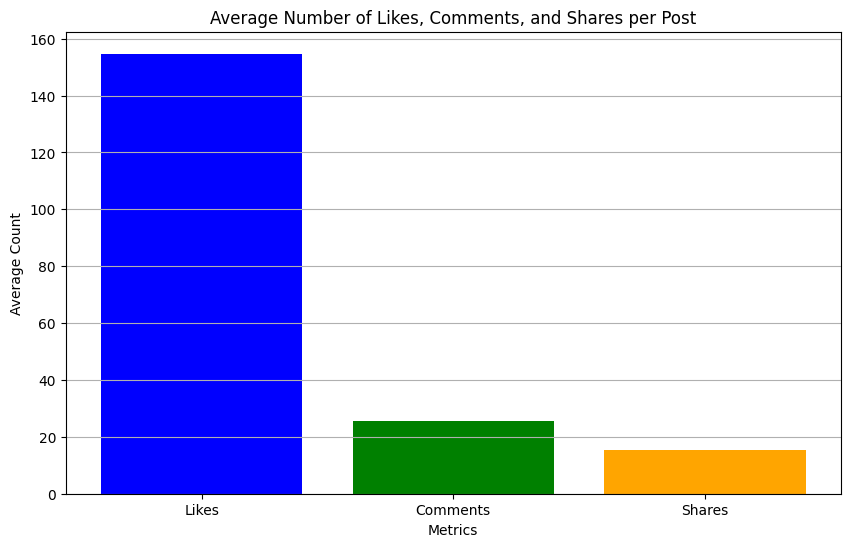

In [308]:
average_data = {
    'Metric': ['Likes', 'Comments', 'Shares'],
    'Average': [average_likes, average_comments, average_shares]
}

average_df = pd.DataFrame(average_data)

plt.figure(figsize=(10, 6))
plt.bar(average_df['Metric'], average_df['Average'], color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Average Count')
plt.title('Average Number of Likes, Comments, and Shares per Post')
plt.grid(axis='y')
plt.show()

In [309]:
#Apakah ada korelasi antara panjang teks postingan dengan jumlah interaksi?

data['content_length'] = data['content'].apply(len)
data['total_interactions'] = data['likes'] + data['comments'] + data['shares']
correlation = data[['content_length', 'total_interactions']].corr().iloc[0, 1]

print(f'Correlation between content length and total interactions: {correlation:.2f}')

Correlation between content length and total interactions: 0.01


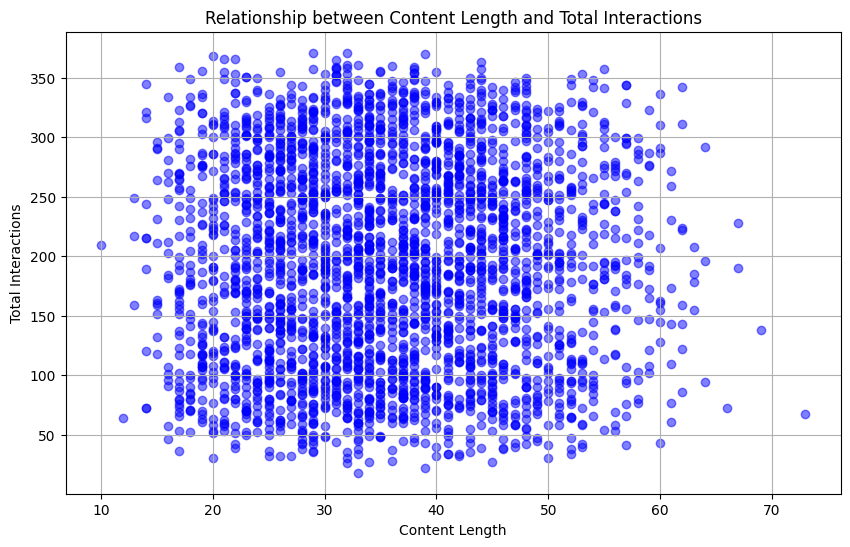

In [310]:
plt.figure(figsize=(10, 6))
plt.scatter(data['content_length'], data['total_interactions'], alpha=0.5, color='blue')
plt.xlabel('Content Length')
plt.ylabel('Total Interactions')
plt.title('Relationship between Content Length and Total Interactions')
plt.grid(True)
plt.show()

In [311]:
#Siapa pengguna yang memiliki dampak terbesar dalam jaringan sosial berdasarkan jumlah retweet/share atau interaksi yang mereka dapatkan?

user_interactions = data.groupby('username')['total_interactions'].sum().reset_index()
most_impactful_user = user_interactions.loc[user_interactions['total_interactions'].idxmax()]

print(f'The user with the most impact is: {most_impactful_user["username"]}')
print(f'Total interactions: {most_impactful_user["total_interactions"]}')

The user with the most impact is: johnsonmichael
Total interactions: 838


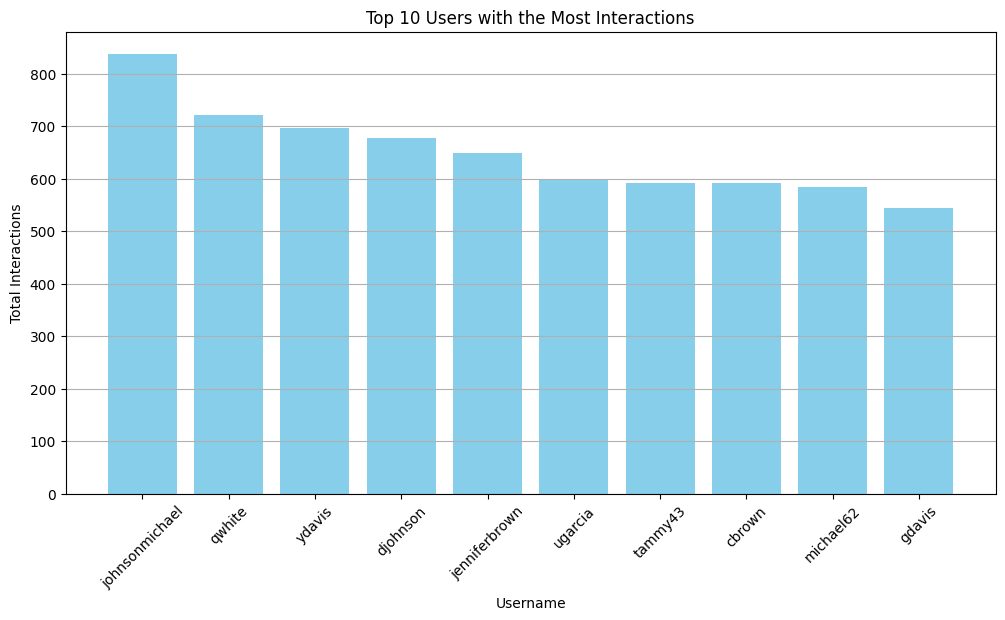

In [312]:
top_users = user_interactions.sort_values(by='total_interactions', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_users['username'], top_users['total_interactions'], color='skyblue')
plt.xlabel('Username')
plt.ylabel('Total Interactions')
plt.title('Top 10 Users with the Most Interactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()